# 
Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.metrics import plot_roc_curve 
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df=pd.read_excel(r"C:\Users\Jitender\Data_Train.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# 
These are the categorical columns in the given dataset

In [5]:
df.shape 

(10683, 11)

# 
Dataset having 10683 rows and 11 columns

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# 
The dataset contains integer and object type data

In [7]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [74]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,20.646916,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,810.459234,3.591220,3.847515
std,2.352155,11.481048,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,568.936982,1.623233,2.522704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,235.000000,3.000000,2.000000
50%,4.000000,21.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,795.000000,4.000000,3.000000
75%,4.000000,31.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,1336.000000,5.000000,6.000000
max,11.000000,39.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,1869.000000,6.000000,8.000000


# 
These are the unique values present in each column

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# 
Missing values present in Route and Total_Stops.Will fill them using imputation techniques.

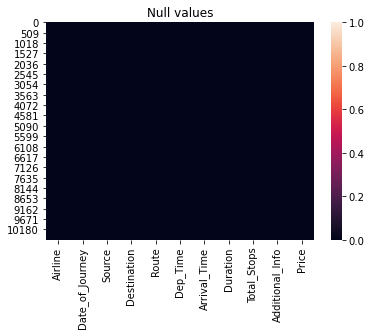

In [9]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [10]:
df["Route"] = df["Route"].fillna(df["Route"].mode()[0])


df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

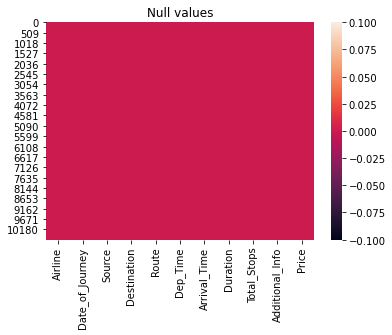

In [12]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [13]:
df['Date_of_Journey'] = pd.to_datetime(arg=df['Date_of_Journey'])

In [14]:
df["Month"] = df["Date_of_Journey"].dt.month
df["Year"] = df["Date_of_Journey"].dt.year
df["Day"] = df["Date_of_Journey"].dt.day

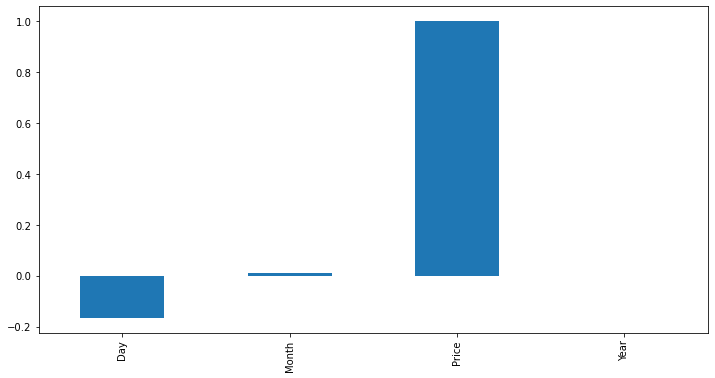

In [15]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar');

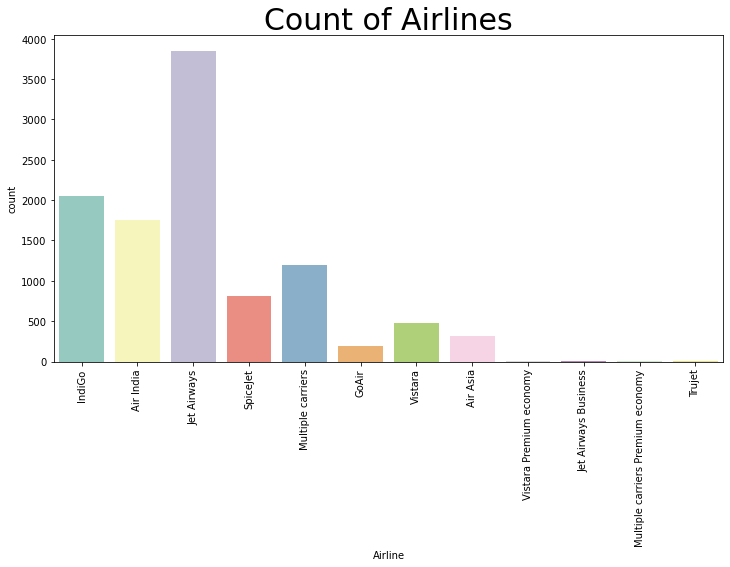

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

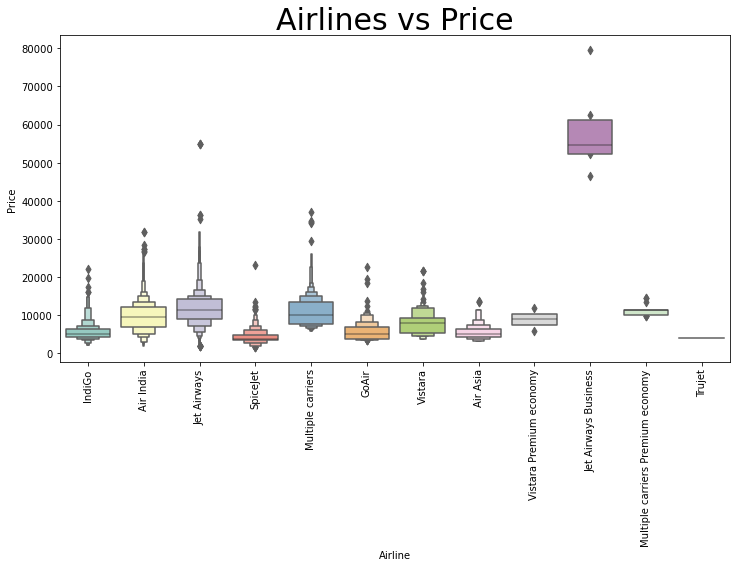

In [17]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

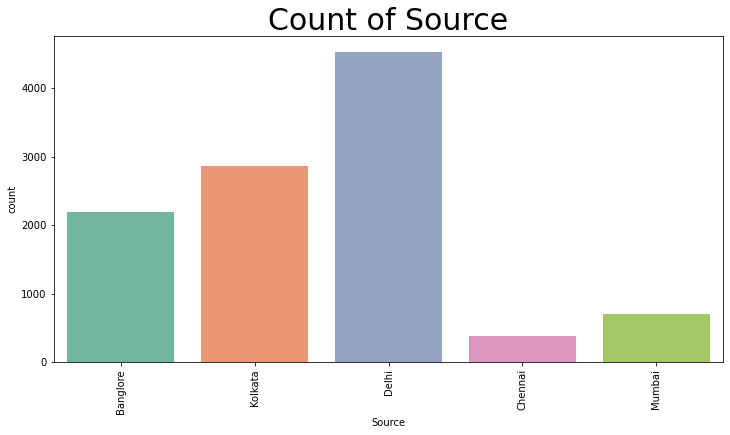

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

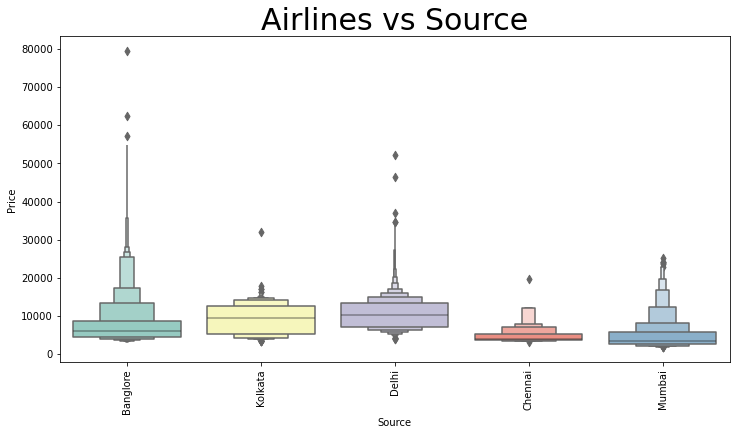

In [19]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Source'], df['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

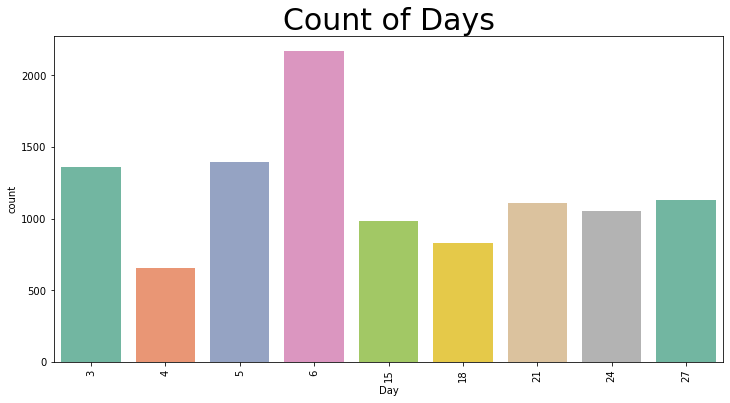

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(df['Day'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

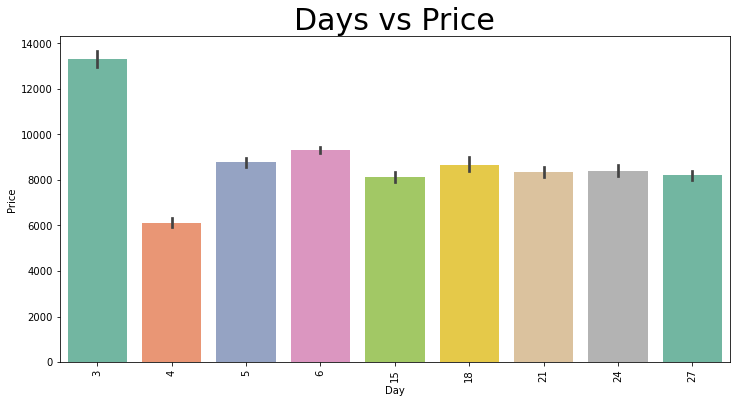

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(df['Day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [22]:
df['Month'] = df['Month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

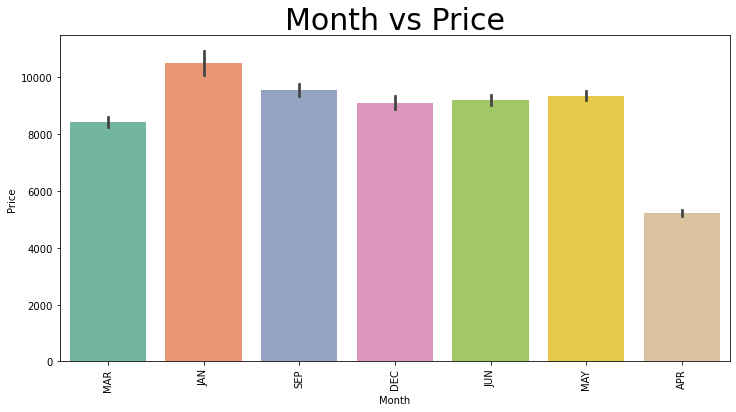

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

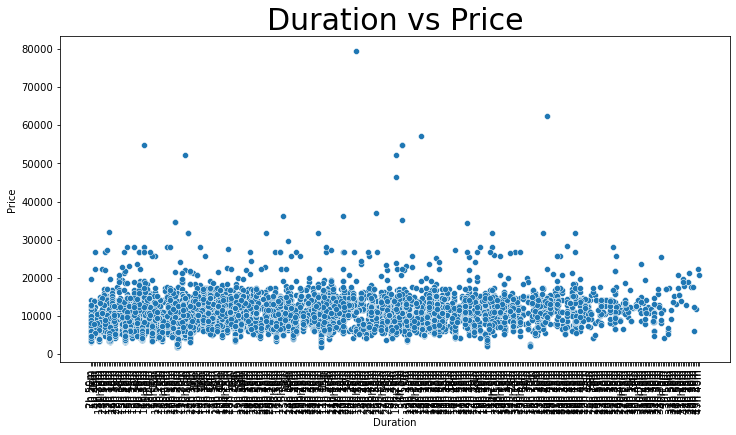

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

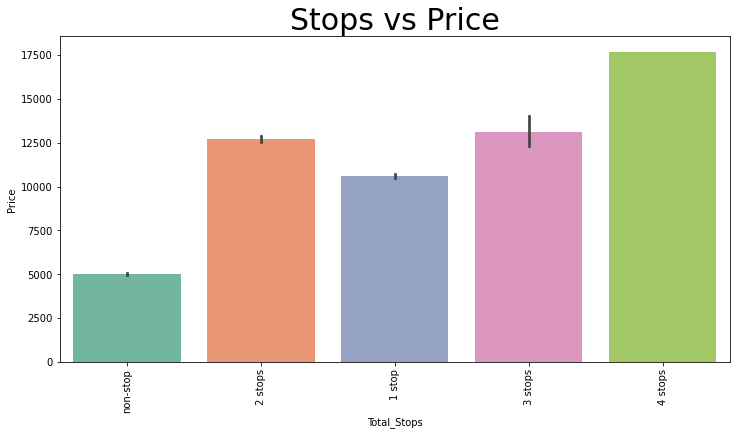

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

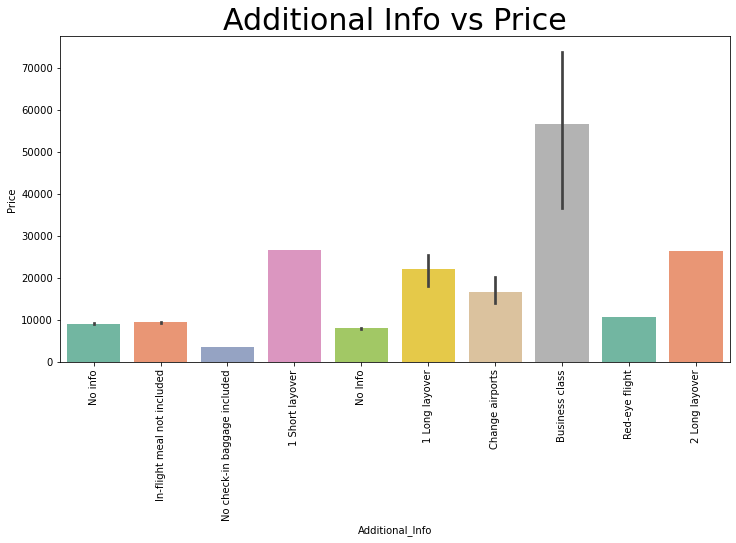

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [27]:
df = df.apply(LabelEncoder().fit_transform)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Year,Day
0,3,11,0,5,18,211,233,240,4,8,65,4,0,7
1,1,2,3,0,84,31,906,336,1,8,669,2,0,2
2,4,35,2,1,118,70,413,106,1,8,1537,6,0,3
3,3,38,3,0,91,164,1324,311,0,8,389,1,0,2
4,3,0,0,5,29,149,1237,303,0,8,1457,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,33,3,0,64,183,1259,236,4,8,81,6,0,1
10679,1,17,3,0,64,193,1305,237,4,8,84,0,0,8
10680,4,17,0,2,18,58,824,280,4,8,604,0,0,8
10681,10,0,0,5,18,92,938,238,4,8,1377,2,0,0


# 
The categorical columns has been converted into numerical columns by using label encoding

In [28]:
df.drop(['Year'],axis=1,inplace=True)

In [29]:
print(df.corr())

                  Airline  Date_of_Journey    Source  Destination     Route  \
Airline          1.000000         0.003995 -0.013401     0.018479  0.025118   
Date_of_Journey  0.003995         1.000000  0.088228    -0.159188  0.106745   
Source          -0.013401         0.088228  1.000000    -0.592574  0.403403   
Destination      0.018479        -0.159188 -0.592574     1.000000 -0.461183   
Route            0.025118         0.106745  0.403403    -0.461183  1.000000   
Dep_Time        -0.039439         0.028221  0.055191    -0.063608 -0.082051   
Arrival_Time    -0.015733        -0.005497  0.020844    -0.036830  0.010560   
Duration         0.027917        -0.040362 -0.192009     0.022037 -0.062097   
Total_Stops      0.036064        -0.058328 -0.225601     0.337883 -0.437783   
Additional_Info -0.060802        -0.019679 -0.022107     0.026806  0.035188   
Price           -0.043030         0.038818  0.085124    -0.156205  0.243237   
Month            0.001010         0.097662  0.078704

<function matplotlib.pyplot.show(close=None, block=None)>

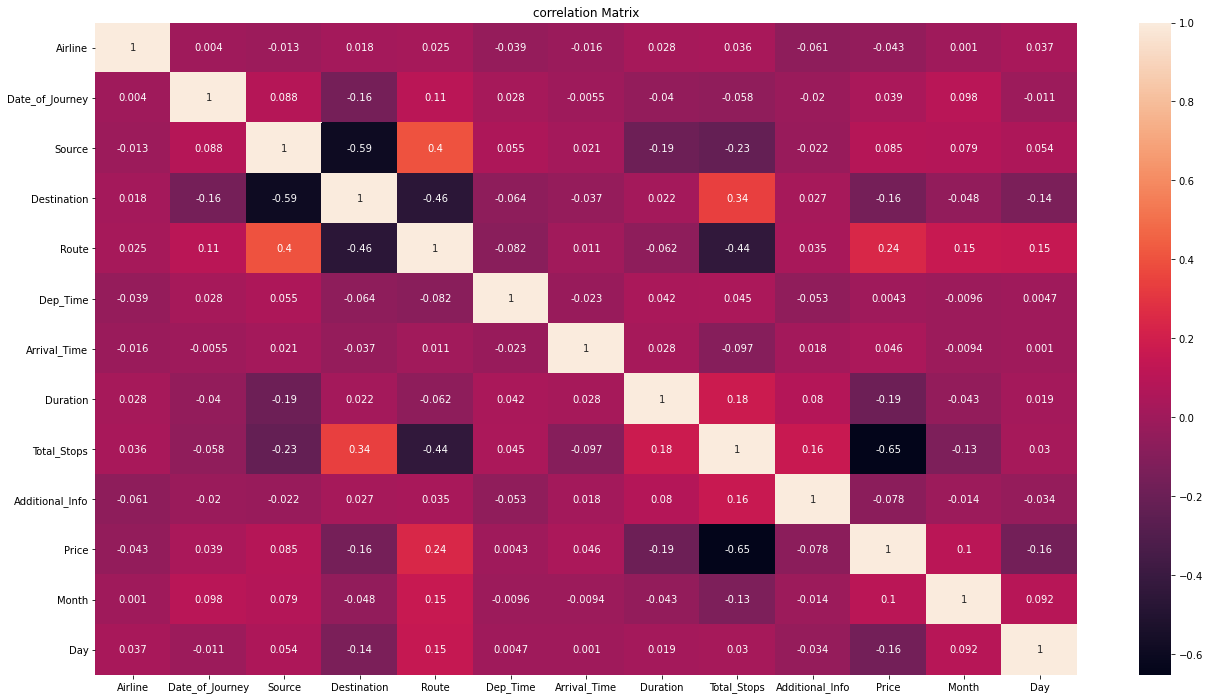

In [30]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

# 
a).The target column Price is highly positively correlated with the feature Route. 

b).The other features have very less correlation with the target column.

c).Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

d).Dark shades are highly correlated and light shades are very less correlated.

In [31]:
corr_matrix=df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.243237
Month              0.103161
Source             0.085124
Arrival_Time       0.046430
Date_of_Journey    0.038818
Dep_Time           0.004306
Airline           -0.043030
Additional_Info   -0.078445
Destination       -0.156205
Day               -0.162706
Duration          -0.191956
Total_Stops       -0.653260
Name: Price, dtype: float64

# 
The target column Price is highly positively correlated with the feature Route.

In [32]:
x=df.drop('Price', axis=1)
y=df['Price']

In [33]:
x.skew()

Airline            0.731095
Date_of_Journey   -0.159659
Source            -0.424054
Destination        1.244169
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -1.779838
Month             -0.340265
Day                0.136992
dtype: float64

# 
The skewness present in Airline,Destination,Arrival_Time,Total_Stops,Additional_Info,the above columns.

In [34]:
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [35]:
x.skew()

Airline           -0.015312
Date_of_Journey   -0.304366
Source            -0.238259
Destination        0.041560
Route             -0.442983
Dep_Time          -0.150760
Arrival_Time      -0.381592
Duration          -0.390688
Total_Stops        0.325203
Additional_Info   -1.372067
Month             -0.172735
Day               -0.158549
dtype: float64

# 
The data is almost normal also we have removed the skewness that we can notice in the above

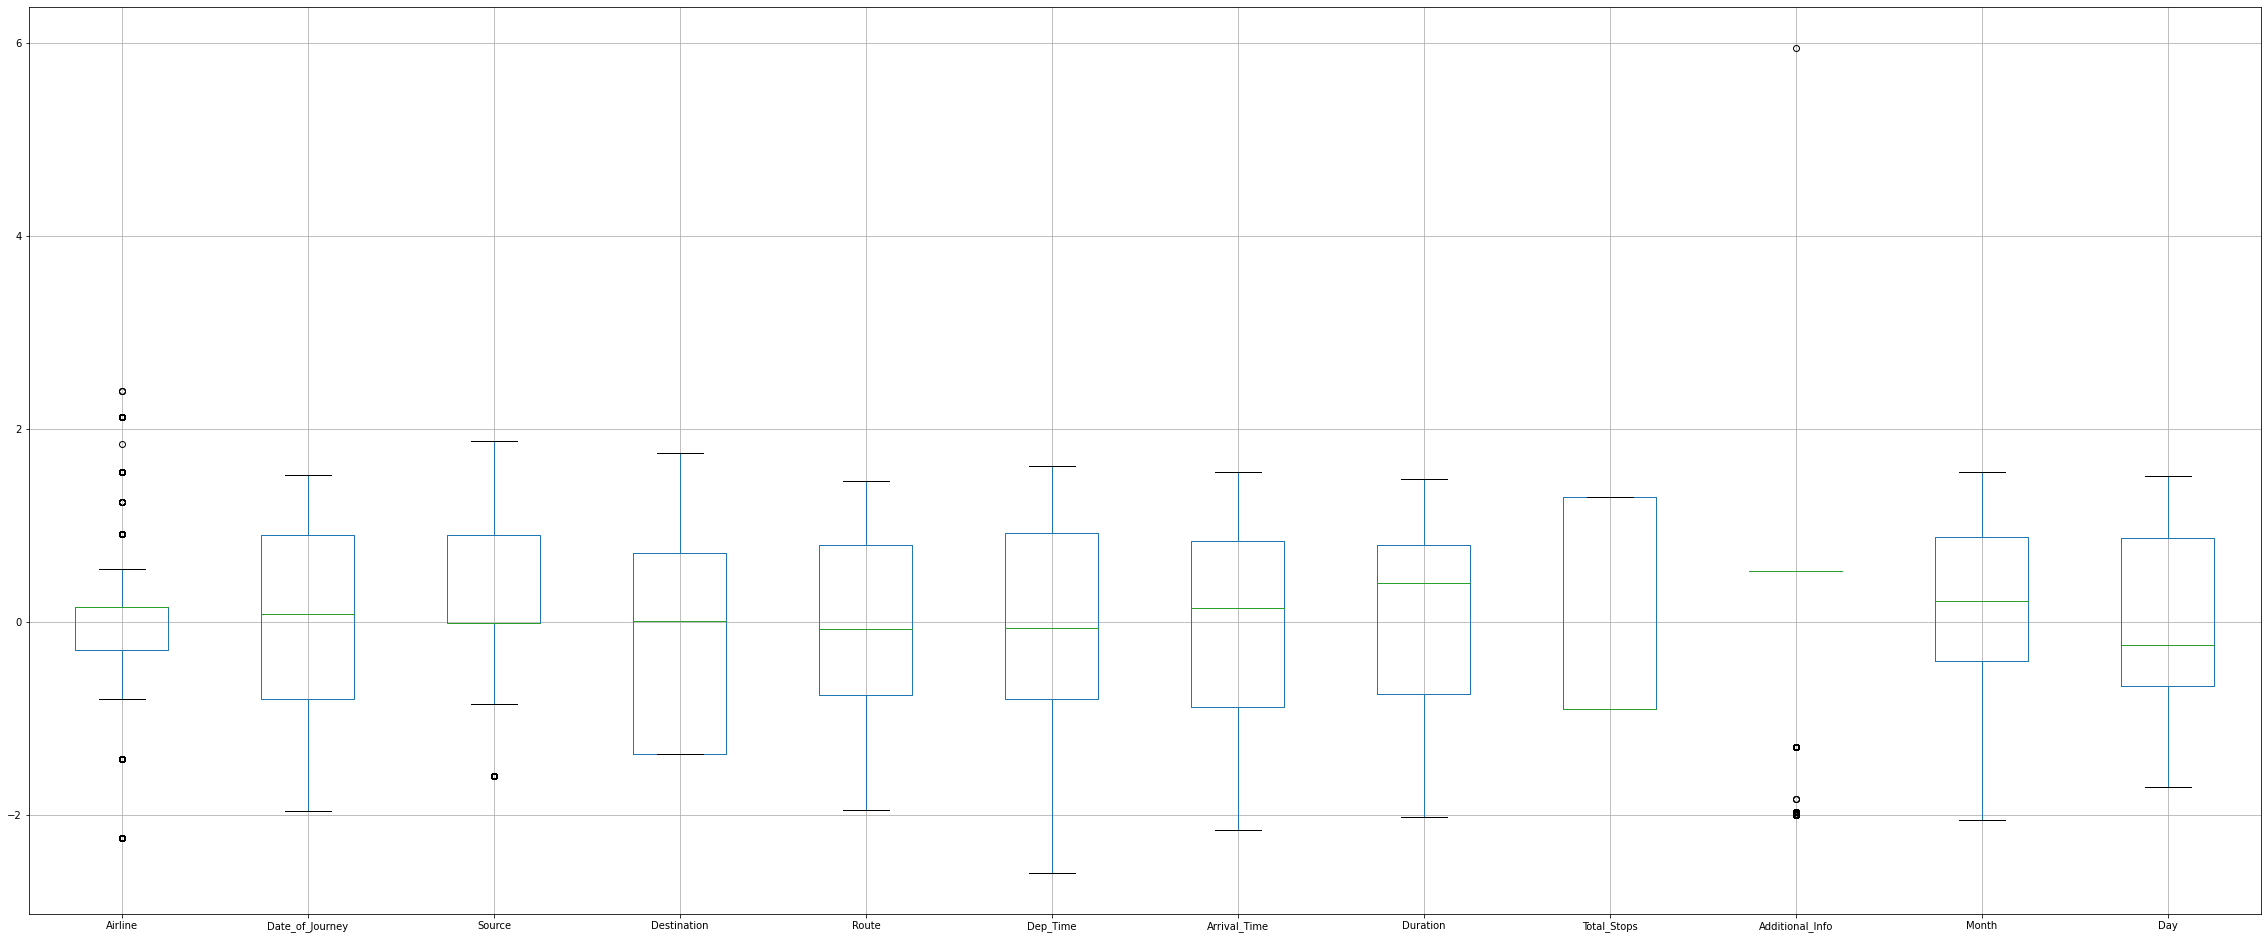

In [36]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

# 
Since Airline,Source,Additional_Info to remove outliers.In all  i have to remove outliers.

In [37]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  785,  1043,  2079,  2405,  2481,  2495,  2556,  2924,  3032,
         3111,  3700,  3788,  4521,  5013,  5372,  5628,  6024,  6336,
         6576,  7724,  8957,  9019,  9657, 10364, 10511], dtype=int64),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9], dtype=int64))

In [38]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,3,11,0,5,18,211,233,240,4,8,65,4,7
1,1,2,3,0,84,31,906,336,1,8,669,2,2
2,4,35,2,1,118,70,413,106,1,8,1537,6,3
3,3,38,3,0,91,164,1324,311,0,8,389,1,2
4,3,0,0,5,29,149,1237,303,0,8,1457,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,33,3,0,64,183,1259,236,4,8,81,6,1
10679,1,17,3,0,64,193,1305,237,4,8,84,0,8
10680,4,17,0,2,18,58,824,280,4,8,604,0,8
10681,10,0,0,5,18,92,938,238,4,8,1377,2,0


# 
This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [39]:
df_new_z.shape

(10658, 13)

In [40]:
data_loss = (10683-10658)/10683*100
data_loss

0.23401666198633342

# 
Using Zscore i have 0.2340% data loss.Which is less than 10%

In [41]:
y.value_counts()

1054    258
1125    212
604     162
162     160
165     131
       ... 
1579      1
1619      1
1675      1
1723      1
1863      1
Name: Price, Length: 1870, dtype: int64

# 
Here we can notice the class imbalancing issue so lets balance the data

In [93]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print("Before oversampling: ",Counter(y_train))

SMOTE = SMOTE()

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({3: 1475, 0: 990, 2: 963, 8: 809, 7: 762, 6: 761, 4: 672, 5: 576, 1: 470})
After oversampling:  Counter({2: 1475, 3: 1475, 5: 1475, 7: 1475, 4: 1475, 6: 1475, 8: 1475, 1: 1475, 0: 1475})


# 
The data is balanced now.

In [45]:
df_new_z.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,3,11,0,5,18,211,233,240,4,8,65,4,7
1,1,2,3,0,84,31,906,336,1,8,669,2,2
2,4,35,2,1,118,70,413,106,1,8,1537,6,3
3,3,38,3,0,91,164,1324,311,0,8,389,1,2
4,3,0,0,5,29,149,1237,303,0,8,1457,2,0


In [46]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)  

Best accuracy is 0.9995320542817033 on Random_state 9


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 9)

# 
We have created a new train test split using Random State

In [48]:
R = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 99.95320542817034
[[309   0   0   0   0   0   0   0   0]
 [  0 123   0   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0]
 [  0   0   0 399   0   0   0   0   0]
 [  0   0   0   0 208   0   0   0   0]
 [  0   0   0   0   0 169   0   0   0]
 [  0   0   0   0   0   0 216   0   0]
 [  0   0   0   0   0   0   1 198   0]
 [  0   0   0   0   0   0   0   0 222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       208
           5       1.00      1.00      1.00       169
           6       1.00      1.00      1.00       216
           7       1.00      0.99      1.00       199
           8       1.00      1.00      1.00       222

    accuracy                           1.00      2137
   macro avg       1.00  

# 
The accuracy using Logistic Regression Classifier is 99.953%

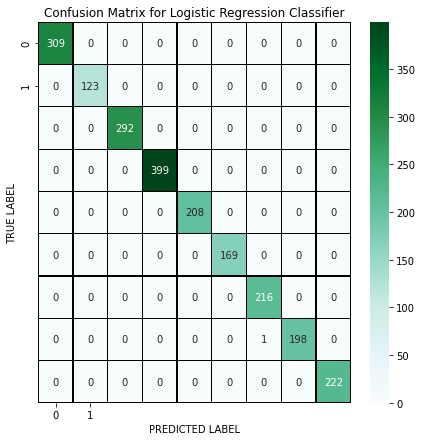

In [49]:
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [50]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 100.0
[[309   0   0   0   0   0   0   0   0]
 [  0 123   0   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0]
 [  0   0   0 399   0   0   0   0   0]
 [  0   0   0   0 208   0   0   0   0]
 [  0   0   0   0   0 169   0   0   0]
 [  0   0   0   0   0   0 216   0   0]
 [  0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   0 222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       208
           5       1.00      1.00      1.00       169
           6       1.00      1.00      1.00       216
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       222

    accuracy                           1.00      2137
   macro avg       1.00      1.00    

# 
The accuracy by using Decision Tree Classifier is 100%

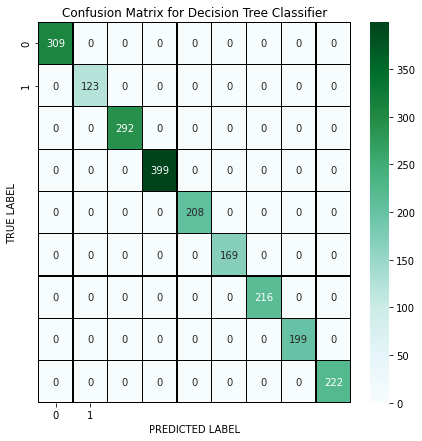

In [51]:
cm = confusion_matrix(y_test,preddt)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [52]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 100.0
[[309   0   0   0   0   0   0   0   0]
 [  0 123   0   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0]
 [  0   0   0 399   0   0   0   0   0]
 [  0   0   0   0 208   0   0   0   0]
 [  0   0   0   0   0 169   0   0   0]
 [  0   0   0   0   0   0 216   0   0]
 [  0   0   0   0   0   0   0 199   0]
 [  0   0   0   0   0   0   0   0 222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       208
           5       1.00      1.00      1.00       169
           6       1.00      1.00      1.00       216
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       222

    accuracy                           1.00      2137
   macro avg       1.00      1.00    

# 
The accuracy by using Random Forest Classifier is 100%

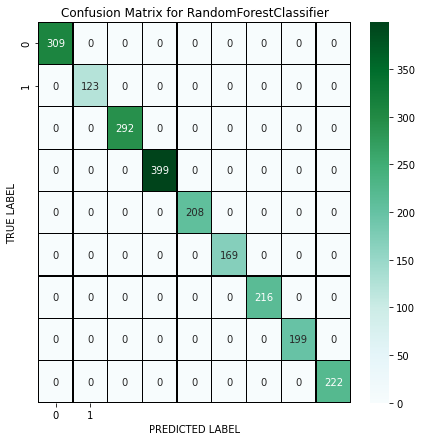

In [53]:
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [54]:
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 99.719232569022
[[309   0   0   0   0   0   0   0   0]
 [  0 123   0   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0]
 [  0   0   0 399   0   0   0   0   0]
 [  0   0   0   0 208   0   0   0   0]
 [  0   0   0   0   1 168   0   0   0]
 [  0   0   0   0   0   0 216   0   0]
 [  0   0   0   0   0   0   2 197   0]
 [  0   0   0   0   0   0   0   3 219]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       292
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       208
           5       1.00      0.99      1.00       169
           6       0.99      1.00      1.00       216
           7       0.98      0.99      0.99       199
           8       1.00      0.99      0.99       222

    accuracy                           1.00      2137
   macro avg       1.00    

# 
The accuracy using SVC is 99.719%

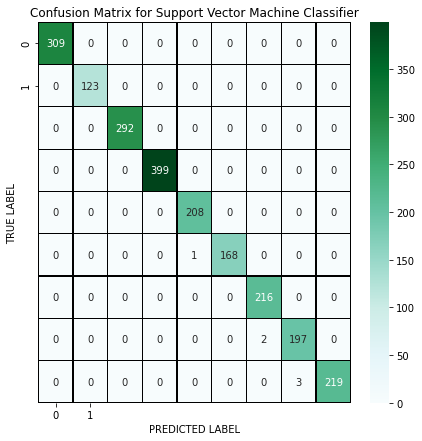

In [55]:
cm = confusion_matrix(y_test,ad_pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [56]:
scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.998221368119051


In [57]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.9999064108563406


In [58]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.9963492785398692


In [59]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [60]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [61]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=39, max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

97.23912026204961


In [62]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

1.0

In [64]:
import joblib 
joblib.dump(GCV.best_estimator_,"Flightprice_prediction.pkl")

['Flightprice_prediction.pkl']

In [89]:
model=joblib.load("Flightprice_prediction.pkl")


prediction = model.predict(x_test)
prediction

array([3, 8, 8, ..., 0, 6, 2], dtype=int64)

In [90]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,3.0,0.0
1,8.0,0.0
2,8.0,0.0
3,8.0,1.0
4,3.0,1.0
...,...,...
2132,2.0,NaN
2133,0.0,NaN
2134,0.0,NaN
2135,6.0,NaN
